## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_combined = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

# Display the data table for preview
mouse_data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

number_of_mice = mouse_data_combined["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data_combined[mouse_data_combined.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = mouse_data_combined[mouse_data_combined["Mouse ID"] !="g989"]
clean_mice_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

number_of_clean_mice = clean_mice_df["Mouse ID"].nunique()
number_of_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor_volume = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
median_tumor_volume = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
variance_tumor_volume = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
std_tumor_volume = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
sem_tumor_volume = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()

summary_stats_df = pd.DataFrame({
    "Average":mean_tumor_volume,
    "Median":median_tumor_volume,
    "Variance":variance_tumor_volume,
    "Standard Deviation":std_tumor_volume,
    "SEM":sem_tumor_volume
})
summary_stats_df.head(5)


,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_single_line = clean_mice_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median", "var", "std", "sem"])     
summary_stats_single_line.head(5)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

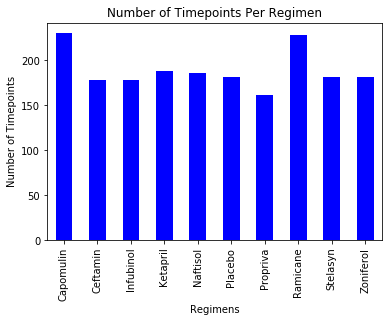

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_of_timepoints_per_regimen = mouse_data_combined.groupby(["Drug Regimen"])["Timepoint"].count()
bar_chart = number_of_timepoints_per_regimen.plot.bar(color="b")
plt.title("Number of Timepoints Per Regimen")
plt.xlabel("Regimens")
plt.ylabel("Number of Timepoints")
bar_chart

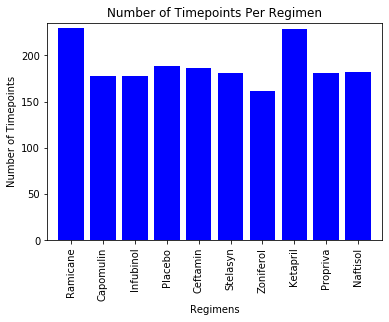

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = mouse_data_combined.groupby(["Drug Regimen"])["Timepoint"].count()
drug_regimen = mouse_data_combined["Drug Regimen"].unique()

x_axis = np.arange(len(timepoints))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation="vertical")
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(timepoints)+5)
plt.title("Number of Timepoints Per Regimen")
plt.xlabel("Regimens")
plt.ylabel("Number of Timepoints")
plt.bar(x_axis, timepoints, color="b", align="center")
plt.show()

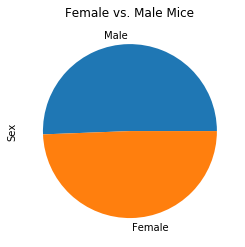

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_vs_male_mice = mouse_data_combined["Sex"].value_counts()
pie_chart = female_vs_male_mice.plot(kind="pie")
plt.title("Female vs. Male Mice")
pie_chart

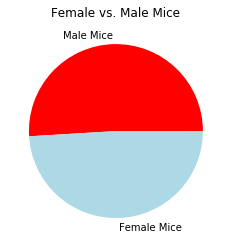

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male Mice", "Female Mice"]
sizes = clean_mice_df["Sex"].value_counts()
colors = ["red", "lightblue"]

plt.title("Female vs. Male Mice")
plt.pie(sizes, labels=labels, colors=colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

capomulin = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Capomulin"]
capomulin_last_timepoint = capomulin.groupby("Mouse ID")["Timepoint"].max()


#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_combined = pd.merge(capomulin_last_timepoint, mouse_data_combined, on=("Mouse ID", "Timepoint"))

capomulin_final_tumor_volume = capomulin_combined["Tumor Volume (mm3)"]

capomulin_quartiles = capomulin_final_tumor_volume.quantile([.25,.5,.75])
capomulin_low_quartile = capomulin_quartiles[.25]
capomulin_high_quartile = capomulin_quartiles[.75]
capomulin_mean = capomulin_quartiles.mean()
capomulin_iqr = capomulin_high_quartile-capomulin_low_quartile
capomulin_lower_bound = capomulin_low_quartile - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_high_quartile + (1.5*capomulin_iqr)
capomulin_outliers = capomulin_quartiles.loc[(capomulin_quartiles < capomulin_lower_bound) & (capomulin_quartiles > capomulin_upper_bound)]

print(f"Capomulin Low Quartile: {capomulin_low_quartile}")
print(f"Capomulin Mean: {capomulin_mean}")
print(f"Capomulin High Quartile: {capomulin_high_quartile}")
print(f"Capomulin Outliers: Below {capomulin_lower_bound} And Above {capomulin_lower_bound}")


Capomulin Low Quartile: 32.37735684
Capomulin Mean: 36.887247179999996
Capomulin High Quartile: 40.1592203
Capomulin Outliers: Below 20.70456164999999 And Above 20.70456164999999


In [16]:
#Ramicane

ramicane = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ramicane"]
ramicane_last_timepoint = ramicane.groupby("Mouse ID")["Timepoint"].max()

ramicane_combined = pd.merge(ramicane_last_timepoint, mouse_data_combined, on=("Mouse ID", "Timepoint"))

ramicane_final_tumor_volume = ramicane_combined["Tumor Volume (mm3)"]

ramicane_quartiles = ramicane_final_tumor_volume.quantile([.25,.5,.75])
ramicane_low_quartile = ramicane_quartiles[.25]
ramicane_high_quartile = ramicane_quartiles[.75]
ramicane_mean = ramicane_quartiles.mean()
ramicane_iqr = ramicane_high_quartile-ramicane_low_quartile
ramicane_lower_bound = ramicane_low_quartile - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_high_quartile + (1.5*ramicane_iqr)
ramicane_outliers = ramicane_quartiles.loc[(ramicane_quartiles < ramicane_lower_bound) & (ramicane_quartiles > ramicane_upper_bound)]

print(f"Ramicane Low Quartile: {ramicane_low_quartile}")
print(f"Ramicane Mean: {ramicane_mean}")
print(f"Ramicane High Quartile: {ramicane_high_quartile}")
print(f"Ramicane Outliers: Below {ramicane_lower_bound} And Above {ramicane_lower_bound}")


Ramicane Low Quartile: 31.56046955
Ramicane Mean: 36.26037603666666
Ramicane High Quartile: 40.65900627
Ramicane Outliers: Below 17.912664470000003 And Above 17.912664470000003


In [17]:
#Infubinol

infubinol = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Infubinol"]
infubinol_last_timepoint = infubinol.groupby("Mouse ID")["Timepoint"].max()

infubinol_combined = pd.merge(infubinol_last_timepoint, mouse_data_combined, on=("Mouse ID", "Timepoint"))

infubinol_final_tumor_volume = infubinol_combined["Tumor Volume (mm3)"]

infubinol_quartiles = infubinol_final_tumor_volume.quantile([.25,.5,.75])
infubinol_low_quartile = infubinol_quartiles[.25]
infubinol_high_quartile = infubinol_quartiles[.75]
infubinol_mean = infubinol_quartiles.mean()
infubinol_iqr = infubinol_high_quartile-infubinol_low_quartile
infubinol_lower_bound = infubinol_low_quartile - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_high_quartile + (1.5*infubinol_iqr)
infubinol_outliers = infubinol_quartiles.loc[(infubinol_quartiles < infubinol_lower_bound) & (infubinol_quartiles > infubinol_upper_bound)]

print(f"Infubinol Low Quartile: {infubinol_low_quartile}")
print(f"Infubinol Mean: {infubinol_mean}")
print(f"Infubinol High Quartile: {infubinol_high_quartile}")
print(f"Infubinol Outliers: Below {infubinol_lower_bound} And Above {infubinol_lower_bound}")


Infubinol Low Quartile: 54.04860769
Infubinol Mean: 59.913177
Infubinol High Quartile: 65.52574285
Infubinol Outliers: Below 36.83290494999999 And Above 36.83290494999999


In [18]:
#Ceftamin

ceftamin = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ceftamin"]
ceftamin_last_timepoint = ceftamin.groupby("Mouse ID")["Timepoint"].max()

ceftamin = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Infubinol"]
ceftamin_last_timepoint = ceftamin.groupby("Mouse ID")["Timepoint"].max()

ceftamin_combined = pd.merge(ceftamin_last_timepoint, mouse_data_combined, on=("Mouse ID", "Timepoint"))

ceftamin_final_tumor_volume = ceftamin_combined["Tumor Volume (mm3)"]

ceftamin_quartiles = ceftamin_final_tumor_volume.quantile([.25,.5,.75])
ceftamin_low_quartile = ceftamin_quartiles[.25]
ceftamin_high_quartile = ceftamin_quartiles[.75]
ceftamin_mean = ceftamin_quartiles.mean()
ceftamin_iqr = ceftamin_high_quartile-ceftamin_low_quartile
ceftamin_lower_bound = ceftamin_low_quartile - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_high_quartile + (1.5*ceftamin_iqr)
ceftamin_outliers = ceftamin_quartiles.loc[(ceftamin_quartiles < ceftamin_lower_bound) & (ceftamin_quartiles > ceftamin_upper_bound)]

print(f"Ceftamin Low Quartile: {ceftamin_low_quartile}")
print(f"Ceftamin Mean: {ceftamin_mean}")
print(f"Ceftamin High Quartile: {ceftamin_high_quartile}")
print(f"Ceftamin Outliers: Below {ceftamin_lower_bound} And Above {ceftamin_lower_bound}")


Ceftamin Low Quartile: 54.04860769
Ceftamin Mean: 59.913177
Ceftamin High Quartile: 65.52574285
Ceftamin Outliers: Below 36.83290494999999 And Above 36.83290494999999


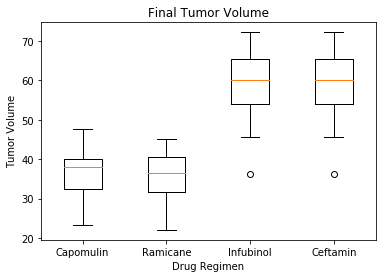

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


data = [capomulin_final_tumor_volume, ramicane_final_tumor_volume, infubinol_final_tumor_volume, ceftamin_final_tumor_volume]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volume")
axl.set_ylabel("Tumor Volume")
axl.set_xlabel("Drug Regimen")
axl.boxplot(data, labels=regimen)
plt.show()


## Line and Scatter Plots

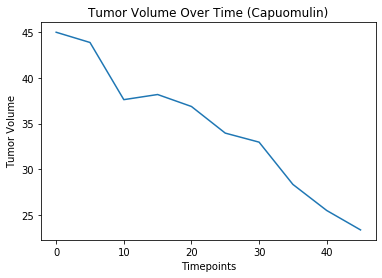

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = capomulin.loc[capomulin["Mouse ID"] == "s185"]
x_axis_1 = line_plot["Timepoint"]
tumor= line_plot["Tumor Volume (mm3)"]
plt.title("Tumor Volume Over Time (Capuomulin)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.plot(x_axis_1, tumor)
plt.show()

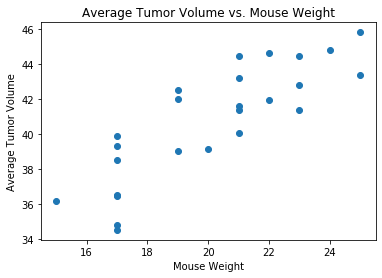

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average = capomulin.groupby("Mouse ID").mean()
mouse_weight = capomulin_average["Weight (g)"]
average_tumor_volume = capomulin_average["Tumor Volume (mm3)"]
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(mouse_weight, average_tumor_volume)
plt.show()

## Correlation and Regression

The correlation is: 0.841936342469472
The r-squared is: 0.7088568047708721


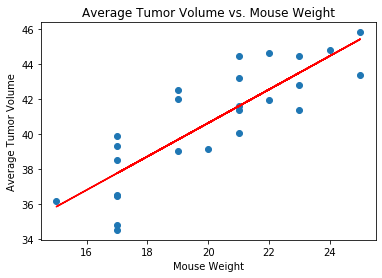

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

capomulin_average = capomulin.groupby("Mouse ID").mean()
mouse_weight = capomulin_average["Weight (g)"]
average_tumor_volume = capomulin_average["Tumor Volume (mm3)"]
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
print(f"The correlation is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()
